# Clustering 

### 1.	Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_excel("C:\\Users\\SHUBHAM GARKAL\\Downloads\\EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Dropping ID column as it's not needed for clustering
data.drop('ID#', axis=1, inplace=True)

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
# Hierarchical clustering
def hierarchical_clustering(data):
    model = AgglomerativeClustering(n_clusters=5, linkage='ward')
    clusters = model.fit_predict(data)
    return clusters

In [6]:
# K-means clustering
def kmeans_clustering(data):
    model = KMeans(n_clusters=5, random_state=42)
    clusters = model.fit_predict(data)
    return clusters

In [7]:
# DBSCAN clustering
def dbscan_clustering(data):
    model = DBSCAN(eps=0.5, min_samples=5)
    clusters = model.fit_predict(data)
    return clusters

In [8]:
# Apply clustering algorithms
hierarchical_clusters = hierarchical_clustering(scaled_data)
kmeans_clusters = kmeans_clustering(scaled_data)
dbscan_clusters = dbscan_clustering(scaled_data)

In [9]:
# Inferences
print("Hierarchical Clustering Silhouette Score:", silhouette_score(scaled_data, hierarchical_clusters))
print("K-means Clustering Silhouette Score:", silhouette_score(scaled_data, kmeans_clusters))
print("DBSCAN Clustering Silhouette Score:", silhouette_score(scaled_data, dbscan_clusters))

Hierarchical Clustering Silhouette Score: 0.3098805307874414
K-means Clustering Silhouette Score: 0.3188772727741292
DBSCAN Clustering Silhouette Score: -0.07834757831741164


### 2.	Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import warnings 
warnings.filterwarnings('ignore')

In [11]:
# Load the data
data = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\crime_data.csv",index_col=0)

In [12]:
# Separate features
X = data.iloc[:, :].values

In [13]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Hierarchical Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical_cluster.fit_predict(X_scaled)

In [15]:
# K-means Clustering
kmeans_cluster = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_cluster.fit_predict(X_scaled)

In [16]:
# DBSCAN Clustering
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(X_scaled)

In [17]:
# Add cluster labels to the original dataframe
data['Hierarchical_Cluster'] = hierarchical_labels
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

In [18]:
# Inferences
hierarchical_clusters = data.groupby('Hierarchical_Cluster').mean()
kmeans_clusters = data.groupby('KMeans_Cluster').mean()
dbscan_clusters = data.groupby('DBSCAN_Cluster').mean()

In [19]:
print("Hierarchical Clustering:")
print(hierarchical_clusters)
print("\nK-means Clustering:")
print(kmeans_clusters)
print("\nDBSCAN Clustering:")
print(dbscan_clusters)

Hierarchical Clustering:
                         Murder     Assault   UrbanPop       Rape  \
Hierarchical_Cluster                                                
0                     12.331579  259.315789  68.315789  29.215789   
1                      6.210526  142.052632  71.263158  19.184211   
2                      3.091667   76.000000  52.083333  11.833333   

                      KMeans_Cluster  DBSCAN_Cluster  
Hierarchical_Cluster                                  
0                           1.000000            -1.0  
1                           0.263158            -1.0  
2                           2.000000            -1.0  

K-means Clustering:
                   Murder  Assault   UrbanPop      Rape  Hierarchical_Cluster  \
KMeans_Cluster                                                                  
0                5.656250  138.875  73.875000  18.78125              1.000000   
1               12.165000  255.250  68.400000  29.16500              0.050000   
2        

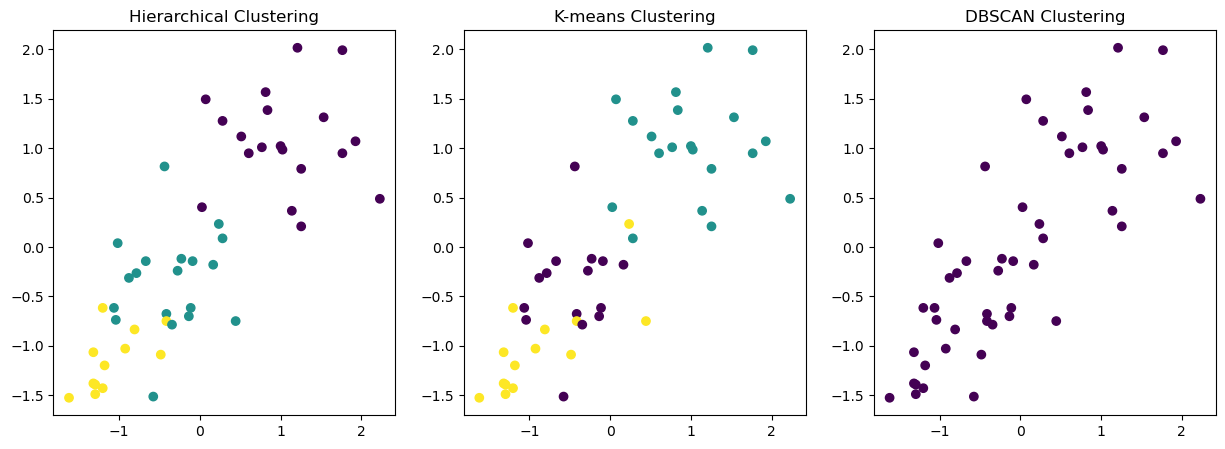

In [20]:
# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()